In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

data = {
    "alan": [2,4],
    "alberto": [3,3],
    "alex": [3,2],
    "zelda": [7,6],
    "zoila": [6,7],
    "zulema": [6,8],
}

people = set(data.keys())
data = pd.DataFrame(data, index = ["ahorro", "evaluacion"])
people
data

,alan,alberto,alex,zelda,zoila,zulema
ahorro,2,3,3,7,6,6
evaluacion,4,3,2,6,7,8


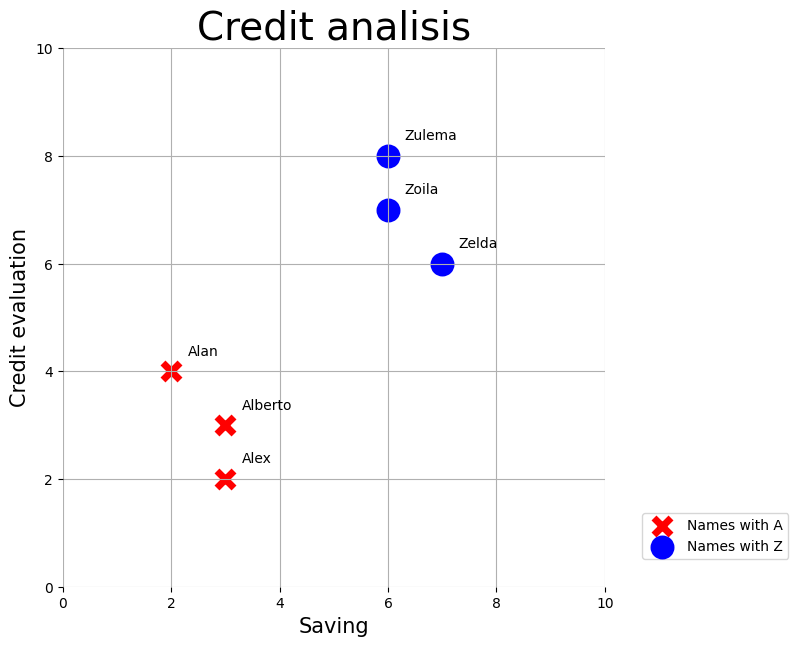

In [10]:
#graphication
plt.figure(figsize=(7,7))
plt.title("Credit analisis", fontsize=28)

plt.scatter(
    data.T[0:3]["ahorro"],
    data.T[0:3]["evaluacion"],
    marker="x", s=150, color="red",
    linewidths=5, label="Names with A"
)

plt.scatter(
    data.T[3:]["ahorro"],
    data.T[3:]["evaluacion"],
    marker="o", s=150, color="blue",
    linewidths=5, label="Names with Z"
)

for i in range(len(data.columns)):
  plt.text(
      data[data.columns[i]][0]+0.3,
      data[data.columns[i]][1]+0.3,
      data.columns[i].capitalize()
      )

plt.xlabel("Saving", fontsize=15)
plt.ylabel("Credit evaluation", fontsize=15)
plt.legend(bbox_to_anchor=(1.35, 0.15))
plt.box(False)
plt.xlim((0,10.01))
plt.ylim((0,10.01))
plt.grid()
plt.show()

In [13]:
# Measurement
#Euclidean distances
print("similarity beteween Alan and Alberto", -((data["alan"]- data["alberto"])**2).sum())
print("similarity beteween Alan and Zulema", -((data["alan"]- data["zulema"])**2).sum())

similarity beteween Alan and Alberto -2
similarity beteween Alan and Zulema -32


In [14]:
#Array of similarity
s = pd.DataFrame(0, columns = data.columns, index  = data.columns)

for i in people:
  for k in people:
    s.loc[i,k] = -((data[i]-data[k])**2).sum()

s

,alan,alberto,alex,zelda,zoila,zulema
alan,0,-2,-5,-29,-25,-32
alberto,-2,0,-1,-25,-25,-34
alex,-5,-1,0,-32,-34,-45
zelda,-29,-25,-32,0,-2,-5
zoila,-25,-25,-34,-2,0,-1
zulema,-32,-34,-45,-5,-1,0


In [15]:
# preference to proorize each point as principal or important

np.fill_diagonal(s.values, np.min(s.values))
s

,alan,alberto,alex,zelda,zoila,zulema
alan,-45,-2,-5,-29,-25,-32
alberto,-2,-45,-1,-25,-25,-34
alex,-5,-1,-45,-32,-34,-45
zelda,-29,-25,-32,-45,-2,-5
zoila,-25,-25,-34,-2,-45,-1
zulema,-32,-34,-45,-5,-1,-45


In [16]:
# Available array
d = pd.DataFrame(0, columns = data.columns, index=data.columns)
d

,alan,alberto,alex,zelda,zoila,zulema
alan,0,0,0,0,0,0
alberto,0,0,0,0,0,0
alex,0,0,0,0,0,0
zelda,0,0,0,0,0,0
zoila,0,0,0,0,0,0
zulema,0,0,0,0,0,0


In [18]:
# availabel messages
#responsability is updated from similarity and availability
s

,alan,alberto,alex,zelda,zoila,zulema
alan,-45,-2,-5,-29,-25,-32
alberto,-2,-45,-1,-25,-25,-34
alex,-5,-1,-45,-32,-34,-45
zelda,-29,-25,-32,-45,-2,-5
zoila,-25,-25,-34,-2,-45,-1
zulema,-32,-34,-45,-5,-1,-45


In [20]:

# $responsability ["Alan", "Alberto"]
sim = s.loc["alan", "alberto"]
sim_other = s.loc["alan", [	"alan",	"alex",	"zelda","zoila",	"zulema"]]
dis_other = d.loc["alan", [	"alan",	"alex",	"zelda","zoila",	"zulema"]]


print("How probable suitabele is albert as an exemplar of alan: ", sim - max(sim_other - dis_other))


# $responsability ["Alan", "zulema"]
sim = s.loc["alan", "zulema"]
sim_other = s.loc["alan", [	"alan",	"alex", "alberto",	"zelda","zoila"]]
dis_other = d.loc["alan", [	"alan",	"alex", "alberto",	"zelda","zoila"]]
print("How probable suitabele is zulema as an exemplar of alan: ", sim - max(sim_other - dis_other))

How probable suitabele is albert as an exemplar of alan:  3
How probable suitabele is zulema as an exemplar of alan:  -30


In [28]:
# Main algorith - update of arrays,
# r: responsability
# d: availability
# a: assignment

#responsability array
r = pd.DataFrame(0, columns = data.columns, index=data.columns)

for i in range(10):
  factor = 0.5
  #update of responsabilities
  r_previous = r.copy()
  for i in people:
    for k in people:
      elegible = list(people.difference({k}))
      r.loc[i,k] = s.loc[i,k] - max(s.loc[i,elegible] + d.loc[i,elegible])

  r = (1-factor)*r + factor*r_previous

  #updating of availability
  d_previous = d.copy()
  for i in people:
    for k in people:
      if i == k:
        elegible = list(people.difference({i}))
        d.loc[k,k] = r.loc[elegible, k][r.loc[elegible, k] > 0].sum()
      else:
        elegible = list(people.difference({i,k}))
        d.loc[i,k] = min(0, r.loc[k,k] + r.loc[elegible, k][r.loc[elegible, k]> 0].sum())

    d =  (1 - factor) * r + factor*r_previous
    #update of assignaments
    a = r + d

In [32]:
np.set_printoptions(precision=2)
print("Maximun: ", a.max(1).values)
print("position of Maximun: ", np.argmax(a.values, axis=1))
a.round(decimals=2)

Maximun:  [33.19 11.06 44.26 33.19 11.06 44.26]
position of Maximun:  [1 2 1 4 5 4]


,alan,alberto,alex,zelda,zoila,zulema
alan,-113.09,33.19,-33.19,-81.13,-73.14,-87.13
alberto,-11.06,-96.96,11.06,-57.01,-57.01,-74.99
alex,-44.26,44.26,-124.16,-98.19,-102.19,-124.16
zelda,-81.13,-73.14,-87.13,-113.09,33.19,-33.19
zoila,-57.01,-57.01,-74.99,-11.06,-96.96,11.06
zulema,-98.19,-102.19,-124.16,-44.26,44.26,-124.16


In [33]:
#propagation of afinnity with scikit-learn
clustering = AffinityPropagation(random_state=None).fit(data.T.values)
print("tags of clusters: ", clustering.labels_)
print("Index of clusters: ", clustering.cluster_centers_indices_)

tags of clusters:  [0 0 0 1 1 1]
Index of clusters:  [1 4]
